In [ ]:
# Applying SVR algorithm
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [75]:
train_df = pd.read_csv('train.csv')

In [76]:
# Feature Selection
selected_features = ['MSSubClass', 'LotFrontage','OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'GarageArea', 'GarageCars','FullBath', 'GrLivArea', '1stFlrSF', 'LotArea']
X = train_df[selected_features]
y = train_df['SalePrice']  # Assuming 'Price' is your target variable

# Data Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/Test Split
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [94]:
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error

imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_valid_imputed = imputer.transform(X_valid)

# Create and train the model using SVR
svr = SVR(kernel='rbf', C=5e3, gamma=0.05)
svr.fit(X_train_imputed, y_train)

# Prediction and Evaluation
y_pred = svr.predict(X_valid_imputed)
rmse = mean_squared_error(y_valid, y_pred,squared=False)
mae = mean_absolute_error(y_valid, y_pred)

print(f"RMSE without using 5-fold cross validation: ${rmse}")
print(f" MAE without using 5-fold cross validation: ${mae}")


RMSE without using 5-fold cross validation: $47649.74964039872
 MAE without using 5-fold cross validation: $22760.47893119769


In [95]:
# Applying k-fold cross-validation (k=5)
cross_val_scores = cross_val_score(svr, X_train_imputed, y_train, cv=5, scoring='neg_mean_squared_error')
cross_val_scores = -cross_val_scores

cross_val_rmse = np.sqrt(cross_val_scores)

cross_val_scores_mae = cross_val_score(svr, X_train_imputed, y_train, cv=5, scoring='neg_mean_absolute_error')
cross_val_scores_mae = -cross_val_scores_mae

# Print average RMSE and MAE
print(f"Average RMSE: ${cross_val_rmse.mean()}")
print(f" Average MAE: ${cross_val_scores_mae.mean()}")

Average RMSE: $41940.978086326206
 Average MAE: $23261.86196977298


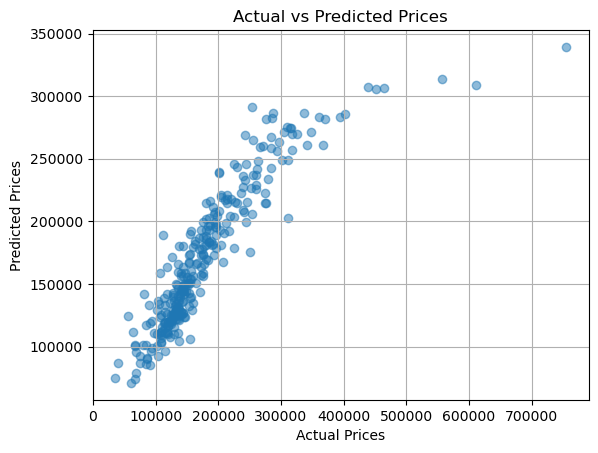

In [57]:
# Plotting
plt.scatter(y_valid, y_pred, alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.grid(True)
plt.show()


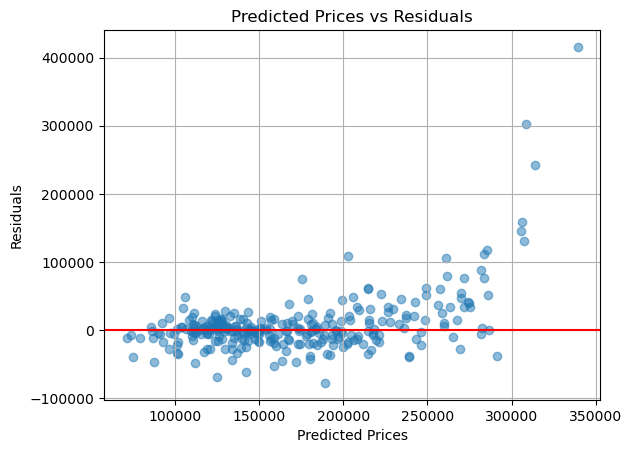

In [58]:
residuals = y_valid - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Predicted Prices vs Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.grid(True)
plt.show()